# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [2]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

In [50]:
import numpy as np
from scipy.stats import norm
from scipy.stats import ttest_1samp
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

**1. Is the distribution of body temperatures normal?** 

To answer this question, first I compared the cumulative distribution frequency of the data with the theoritical normal distribution curve: it's shown that the measured temperature data matches the theoritical normal distribution closely, that the distribution of body temperature is normal.

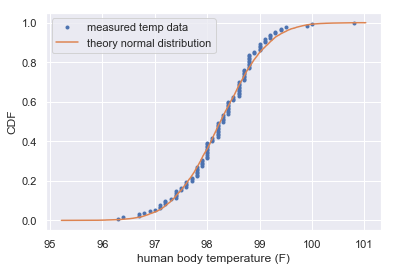

In [174]:
# assign temp to be the body temperature, n is the data size
temp = df['temperature']
n = len(temp)
# calculate the temperature mean and standard deviation
temp_mean = np.mean(df['temperature'])
temp_std = np.std(df['temperature'])
# get the theoritical normal distribution data applying the mean and std calculated above
temp_normal = np.sort(np.random.normal(temp_mean, temp_std, size=10000))
# y axis of CDF of theoritical normal distribution 
y_normal = np.arange(1, len(temp_normal) + 1) / len(temp_normal)
# x and y axises of CDF of body temperature
x = np.sort(temp)
y = np.arange(1, n + 1) / n
# plot the comparison curve
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(temp_normal, y_normal)
_ = plt.xlabel('human body temperature (F)')
_ = plt.ylabel('CDF')
_ = plt.legend(('measured temp data', 'theory normal distribution'))

To further answer is the body temperature distribution normal? I applied the 68–95–99.7 empirical rule below. The corresponding probabilities are 69.2-94.6-99.2, and there is only 1 outlier which located beyond the three sigma range, which further confirm that the body temperature distribution is normal.

In [177]:
# calculate the probabilities of body temperature within 1 standard deviation, 2 standard deviation, and 3 
# standard deviation, and the number of outliers
sigma_1 = np.sum(np.logical_and(temp < (temp_mean + temp_std), temp > (temp_mean - temp_std))) / n
sigma_2 = np.sum(np.logical_and(temp < (temp_mean + 2 * temp_std), temp > (temp_mean - 2 * temp_std))) / n
sigma_3 = np.sum(np.logical_and(temp < (temp_mean + 3 * temp_std), temp > (temp_mean - 3 * temp_std))) / n
outliers = n - sigma_3 * n
sigma_1, sigma_2, sigma_3, outliers

(0.6923076923076923, 0.9461538461538461, 0.9923076923076923, 1.0)

**2. Is the sample size large? Are the observations independent?**

The sample size 130 is large, which is larger than 30, so the central limit therom is applicable. We know there are millions of humans on the earth, and it's apparent that the sample size is less than 10% of the population, so we can say the individual observation is independent and the statistical test is applicable.

**3. Is the true population mean really 98.6 degrees F?**

First let's do a bootstrap hypothesis test 10000 times, and calculate the $p$ value that the mean temperature of bootstrap replicates larger than or equate to the true population mean temperature 98.6 degrees F. The calculated $p$ value is 0.0, that we can reject the null hypothesis (true_mean = 98.6).

In [83]:
# assume the null hypothesis the true population mean is 98.6 degrees F
true_mean = 98.6
# gengerate 10000-times bootstrap tests
bs_temp = np.empty(10000)
for i in range(10000):
    # calculate the mean of each bootstrap test
    bs_temp[i] = np.mean(np.random.choice(temp, size=n))
# calculate the p value that the means of bootstrap test larger than or equate to the true mean    
p_value = np.sum(bs_temp >= true_mean) / 10000
p_value

0.0

For frequantist statistical test, it will be one-sample test, since we are only considering one statistic of human temperature; and since the sample size is larger than *30*, it's appropriate to apply $z$ statistic. 

In the following cell, we apply $z$ statistic and calculate the $p$ value, and then compare with the $p$ value of $t$ statistic. We can see that both $p$ values are very close to *0*, because the $t$ distribution and $z$ distribution look pretty much the same when the sample size is large (over 30). 

In [182]:
# calculate z-score and p value
z_score = (temp_mean - true_mean) / (temp_std / np.sqrt(n))
pval_z = 2 * (1 - norm.cdf(abs(z_score)))
# calculate the p value of t test
pval_t = ttest_1samp(temp, true_mean)[1]
pval_z, pval_t

(4.352315174926957e-08, 2.4106320415561276e-07)

**4. Draw a small sample of size *10* from the data and repeat both frequentist tests.**

For small sample size (less than *30*), $t$ statistic is the one to choose. It indicates that the $p$ values calculated from the two tests are different, that $t$ statistic should be chose when the sample size is small (less than *30*).

In [181]:
# draw a samll sample of size 10 from the data
temp_resampled = np.random.choice(temp, size=10)
# calculate the mean and std of the resampled data
temp_mean_rs = np.mean(temp_resampled)
temp_std_rs = np.std(temp_resampled)
# calculate the z-score and p value of the resampled data
z_rs = (temp_mean_rs - true_mean) / (temp_std_rs / np.sqrt(10))
pval_rs_z = 2 * (1 - norm.cdf(abs(z_rs)))
# calculate the p value of t test of the resample data
pval_rs_t = ttest_1samp(temp_resampled, true_mean)[1]
pval_rs_z, pval_rs_t

(0.026753463249664877, 0.06496789033162993)

**5. At what temperature should we consider someone's temperature to be "abnormal"?**

Two answer this question, two hypothesis tests are conducted:

Generate a one-draw bootstrap test, the *95%* confidence interval is calculated, *(96.5, 99.9)*, and the margin of error is *1.7*. 

And the *95%* confidence interval calculated from $z$ statistic test is *(96.8, 99.7)*, and the margin of error is *1.4*.

So we can consider someone's temperature beyond the *95%* confidence interval to be **"abnormal"**.

In [129]:
# one-draw bootstrap test
bs_temp = np.random.choice(temp, size=n)
# 95% confidence interval
bs_interval = np.percentile(bs_temp, [2.5, 97.5])
# margin of error
bs_margin = bs_interval[1] - np.sum(bs_interval) / 2
bs_interval, bs_margin

(array([96.4675, 99.8875]), 1.7099999999999937)

In [134]:
# z statistic test 95% confidence interval
z_interval = norm.ppf(0.025, loc=temp_mean, scale=temp_std), norm.ppf(0.975, loc=temp_mean, scale=temp_std)
# margin of error
z_margin = z_interval[1] - np.sum(z_interval) / 2
z_interval, z_margin

((96.81775582674821, 99.68070571171329), 1.431474942482538)

**6. Is there a significant difference between males and females in normal temperature?**

To compare the body temperatures between male and female, first I sort the temperature data of male and female, and plot scatter data on the same figure to compare graphically, it's clear that female has higher body temperature.

(98.39384615384614, 98.10461538461539, 65)

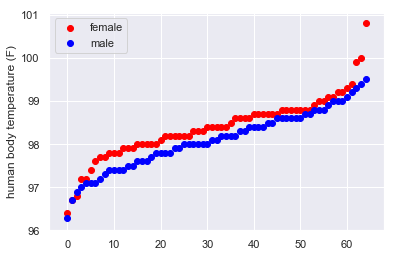

In [170]:
# separate the temperature column to female and male
f_temp = np.sort(df[df['gender'] == 'F']['temperature'])
m_temp = np.sort(df[df['gender'] == 'M']['temperature'])
# plot the female and male body temperature data
x = np.array(range(len(f_temp))
_ = plt.scatter(x,f_temp,color='red')
_ = plt.scatter(x,m_temp,color='blue')
_ = plt.ylabel('human body temperature (F)')
_ = plt.legend(('female', 'male'))

To further confirm the conclusion, draw the bootstrap test 10000 times from the origin temperature data, and assign the first half as female temperature, and second half as male temperature, and then calculte the mean difference as bootstrap replicates. Compare the bootstrap replicates to mean temperature difference between female and male, and $p$ value is *0.99*, showing *99%* of bootstrap replicates are less than the mean temperature difference between female and male, which confirm that there is a significant difference between female and male normal temperature.

In [185]:
# mean difference of female and male temperature
f_temp_mean = np.mean(f_temp)
m_temp_mean = np.mean(m_temp)
diff_mean = f_temp_mean - m_temp_mean
# bootstrap tests
bs_diff_mean = np.empty(10000)
for i in range(10000):
    bs = np.random.choice(temp,size=n)
    bs_diff_mean[i] = np.mean(bs[:65]) - np.mean(bs[65:])
# p value that bs replicates less than or equate to diff_mean
pval = np.sum(bs_diff_mean <= diff_mean) / 10000
pval

0.9863